# Seatwork 10.1 Case Study: Improving RT-IoT2022 Analysis

*What are the things that I could have done better in this dataset?* <br>
- The first one is to rename the selected columns so that it would be clear and not as confusing.
- I could have also checked out and determine the changes in the attributes with regards to the packets.
- Additionally, I could have also thought about the correlation of the attributes with the attack type in order to define the attack type. 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/tipqc/CPE311 - Paala/RT_IOT2022.csv')
df.head()

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [6]:
dfv2 = df.copy()

In [7]:
dfv2.Attack_type.value_counts().nlargest(5)
# By the use of this, we can determine the ranking of the highest to lowest distributions in the dataset.
# We are going to take the top 5 from this ranking, by isolating it using queries

Attack_type
DOS_SYN_Hping     94659
Thing_Speak        8108
ARP_poisioning     7750
MQTT_Publish       4146
NMAP_UDP_SCAN      2590
Name: count, dtype: int64

In [8]:
dfv2_top_5 = dfv2.query("Attack_type == ['DOS_SYN_Hping', 'Thing_Speak', 'ARP_poisioning', 'MQTT_Publish', 'NMAP_UDP_SCAN']")

In [9]:
dfv2_top_5.sort_values('flow_duration', ascending=False).head()

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
20154,7647,39242,443,tcp,ssl,5341.392332,812,546,272,280,...,2.080892e+06,5.004108e+06,2.183106e+07,4.829833e+09,1.349115e+07,5.184225e+06,64240,26847,501,ARP_poisioning
20152,7645,44058,443,tcp,ssl,5340.386892,365,188,183,181,...,8.889340e+04,8.660926e+06,3.094118e+07,5.290016e+09,2.988710e+07,1.607371e+06,64240,26847,501,ARP_poisioning
15208,2701,46602,443,tcp,ssl,2379.349634,106,110,97,8,...,9.173655e+05,5.896647e+06,2.987661e+07,2.338478e+09,2.851802e+07,4.397563e+06,64240,62643,501,ARP_poisioning
15183,2676,37242,443,tcp,ssl,2083.013699,1453,1986,1156,843,...,6.351792e+06,5.329808e+06,5.893482e+07,1.743353e+09,7.817725e+06,5.967887e+06,64240,65535,501,ARP_poisioning
14995,2488,59400,443,tcp,ssl,1401.219948,197,191,41,30,...,1.065720e+06,5.362672e+06,1.025314e+07,1.338364e+09,9.913807e+06,9.132791e+05,64240,65160,0,ARP_poisioning


In [10]:
dfv2.columns

Index(['no', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
  

In [11]:
dfv2_top_5_formulated = df[['id.orig_p',
                            'id.resp_p',
                            'down_up_ratio',
                            'proto',
                            'service',
                            'flow_duration',
                            'payload_bytes_per_second',
                            'active.avg',
                            'idle.avg',
                            'Attack_type']]

<function matplotlib.pyplot.show(close=None, block=None)>

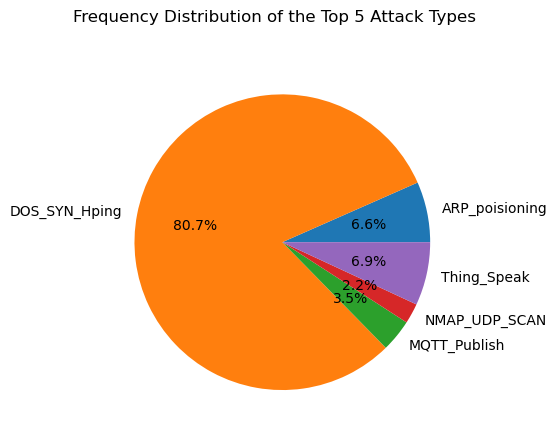

In [17]:
counts = dfv2_top_5.groupby('Attack_type')['Attack_type'].count()
y = counts.values
x = counts.index
plt.pie(y, labels=x, autopct=('%1.1f%%'))
plt.suptitle('Frequency Distribution of the Top 5 Attack Types')
plt.show

<Axes: title={'center': 'The Mean and Standard Deviation of Flow Duration in Each Attack Type'}, ylabel='Attack_type'>

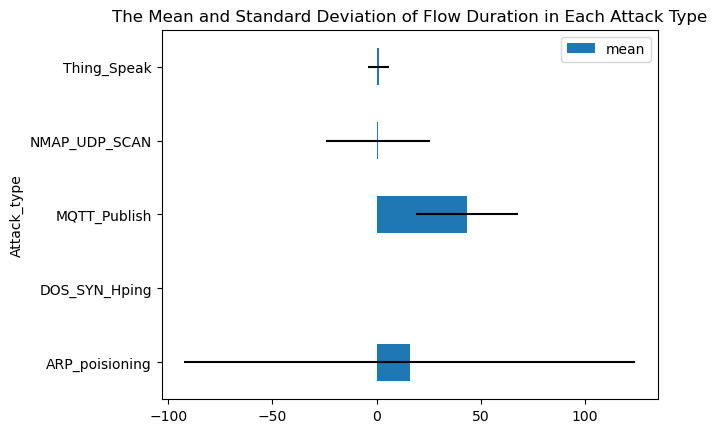

In [30]:
dfv2_mean_std = dfv2_top_5.groupby('Attack_type')['flow_duration'].agg(['mean', 'std'])
dfv2_mean_std.plot(kind='barh', y='mean', xerr='std', title='The Mean and Standard Deviation of Flow Duration in Each Attack Type')

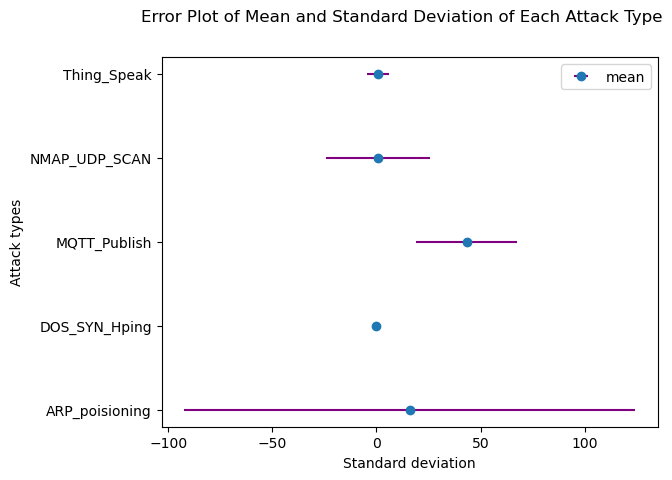

In [48]:
plt.errorbar(dfv2_mean_std['mean'], dfv2_mean_std.index, xerr=dfv2_mean_std['std'], fmt='o', label='mean', ecolor='purple')
plt.suptitle('Error Plot of Mean and Standard Deviation of Each Attack Type')
plt.xlabel('Standard deviation')
plt.ylabel('Attack types')
plt.legend()

In [33]:
dfv2_mean_std

,mean,std
Attack_type,,
ARP_poisioning,15.893538,108.261070
DOS_SYN_Hping,0.000003,0.000002
MQTT_Publish,43.397013,24.341563
NMAP_UDP_SCAN,0.737766,24.909755
Thing_Speak,0.934471,5.251602
